In [1]:
%pylab inline
from scipy.special import erf
from scipy.stats import vonmises,norm
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import iv
from scipy.integrate import dblquad,quad
import matplotlib as mpl

#Set font
font = {'family':'serif','size':10}
mpl.rc('font',**font)

Populating the interactive namespace from numpy and matplotlib


# 2D

In [2]:
def plot_frond(L=1,fr=2,fs=0.5,theta_f=0,alpha=0.7,color='g',fill_bool=True):
    
    #figure(1,figsize=[6,6])
    #gca(projection='polar')
    theta_a = arctan(2*fr*fs/(1+fs))
    theta_prime = linspace(theta_a,pi-theta_a,1e3)
    S = sign(pi/2 - theta_prime)
    r_max = L/(sin(theta_prime)+2*S*fr/(1+fs)*cos(theta_prime)) 
    theta = theta_prime + theta_f - pi/2
    
    if(fill_bool==True):
        fill(r_[0,theta,0],r_[0,r_max,0],color,alpha=alpha)
    else:
        plot(r_[0,theta,0],r_[0,r_max,0],color,alpha=alpha)
    xlim(0,2*pi)
    ylim(0,5)

In [3]:
def plot_rope(N=3,vw=0,theta_w_deg=0,L_mean=3,L_std=1,fr=2,fs=0.5,stiff=1):
    
    # Convert frond angle from degrees to radians
    theta_w = theta_w_deg*pi/180
    
    # Distribution of frond lengths
    L_dist = random.normal(L_mean,L_std,N)
    
    # Distribution of frond angles
    if vw > 0:
        theta_f_dist = random.vonmises(theta_w,vw/stiff,N)
    else:
        theta_f_dist = pi*(random.rand(N)*2-1)
    
    # Plot kelp fronds
    for ii in range(N):
        plot_frond(L_dist[ii],fr,fs,theta_f_dist[ii])

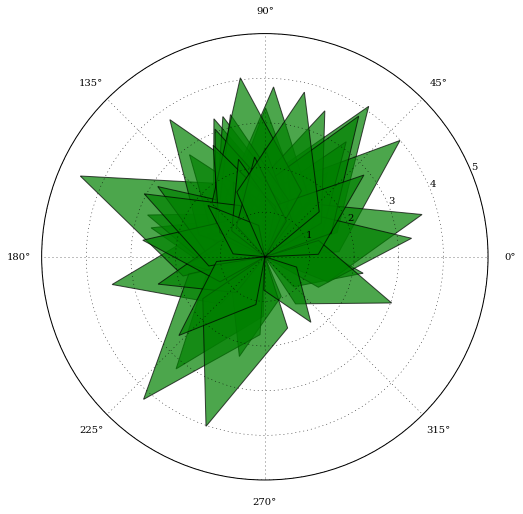

In [9]:
figure(figsize=[8,8])
gca(projection='polar')
plot_rope(50,L_mean=3,L_std=1,vw=1,theta_w_deg=120)
savefig('../reports/figures/kelp_sample_1.png')

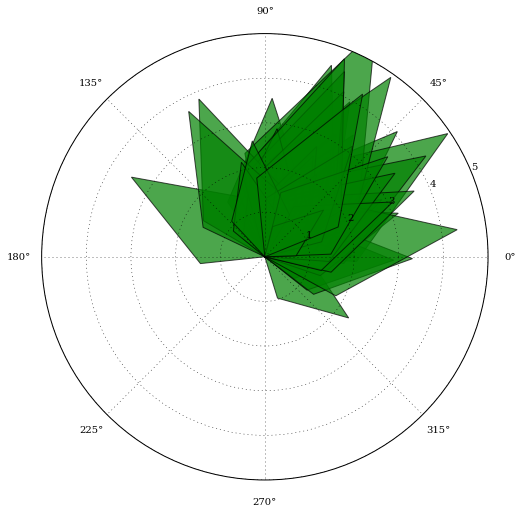

In [10]:
figure(figsize=[8,8])
gca(projection='polar')
plot_rope(50,L_mean=3,L_std=1,vw=4,theta_w_deg=45)
savefig('../reports/figures/kelp_sample_2.png')

In [6]:
import seaborn as sns
sns.set_style('whitegrid')

In [7]:
def qf(theta_f,L,alpha=0.7,color='g',fill_bool=True):
    plot_frond(L,2,0.5,theta_f,alpha=alpha,color=color,fill_bool=fill_bool)
    plot(theta_f,L,'o',mfc=color,mec='k',markersize=5)

In [8]:
# L_star
def Ls(theta_point,r_point,theta_f):
    theta_prime = theta_point - theta_f + pi/2
    S = sign(pi/2-theta_prime)
    return r_point*(sin(theta_prime)+2*S*fr/(1+fs)*cos(theta_prime))

In [9]:
sns.reset_orig()
#Set font
font = {'family':'serif','size':10}
mpl.rc('font',**font)

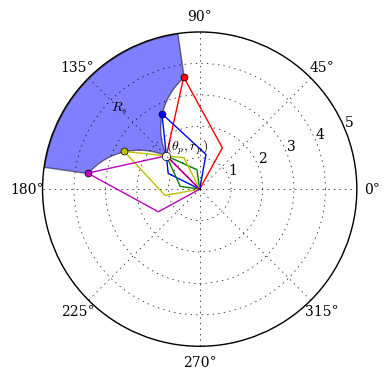

In [10]:
# Figure
#sns.reset_orig()
figure(facecolor='white',figsize=(4,4))
gca(projection='polar')

# Kelp
#qf(pi/4,2)
#qf(pi/3,3)

# Point
theta_point=3*pi/4
r_point=1.5
fr=2
fs=0.5
alpha = arctan((1+fs)/(2*fr*fs))

# Shading Area
th=linspace(theta_point-alpha,theta_point+alpha,101)
th_prime=theta_point-th+pi/2
S = sign(pi/2-th_prime)
fill_between(th,Ls(theta_point,r_point,th),5,facecolor='b',alpha=0.5)
annotate(
    r'$R_s$',
    xy=(theta_point,4),
    va='top',
    ha='left')

# Test
color_list=['r','b','g','y','m']
th1 = linspace(theta_point-alpha,theta_point+alpha,5)
for ii,tt in enumerate(th1):
    qf(tt,Ls(theta_point,r_point,tt),alpha=1,color=color_list[ii],fill_bool=False)

# Point
plot(theta_point,r_point,'ow',mec='k')
annotate(
    r'$(\theta_p,r_p)$',
    xy=(theta_point,r_point),
    verticalalignment='bottom',
    horizontalalignment='left')

tight_layout()
savefig('../reports/figures/shade_area.pdf')

In [11]:
# Plot probability of shading from one frond
def prob_shade(vw=0,theta_w_deg=0,L_mean=3,L_std=1,fr=2,fs=0.5,stiff=1):
    # Convert frond angle from degrees to radians
    theta_w = theta_w_deg*pi/180
    
    # Create figure
    figure(2,figsize=[12,6])
    gca(projection='polar')
    
    # Alpha angle
    alpha = arctan((1+fs)/(2*fr*fs))
    
    # 2D array of theta and r
    TH = linspace(-pi,pi,101)
    RR = linspace(0,5,101)
    theta,rr = meshgrid(TH,RR)
    
    # P(r_max >= r)
    #P_r = (1-erf((rr-L_mean)/(sqrt(2)*L_std)))/(2*(sin(theta)+2*S*fr/(1+fs)*cos(theta)))
    def g(theta_prime):
        S = sign(pi/2-theta_prime)
        return (sin(theta_prime)+2*S*fr/(1+fs)*cos(theta_prime))
    
    # P(theta_a <= theta <= theta_b)
    if vw > 0:
        P_theta = vonmises.cdf(theta+alpha,vw/stiff,theta_w) - vonmises.cdf(theta-alpha,vw/stiff,theta_w)
        #P_r = g(vonmises.pdf(theta,theta_w,vw/stiff))*(1-norm.cdf(rr,L_mean,L_std))
    else:
        P_theta = ones_like(theta)/pi
        #P_r = g(ones_like(theta)/2*pi)*(1-norm.cdf(rr,L_mean,L_std))
        
    # Contour plot
    contourf(theta,rr,P_theta,levels=linspace(0,1,101),cmap='YlGn')
    colorbar()
    

In [12]:
# Probability distribution of L and theta_f
def prob_dist(L_mean,L_std,vw,theta_w):
    LL = linspace(0,5,101)
    theta_f = linspace(-pi,pi,101)
    
    LL,theta_f = meshgrid(LL,theta_f)
    P_L = norm.pdf(LL,L_mean,L_std)
    if vw > 0:
        P_th = vonmises.pdf(theta_f,vw,theta_w)
    else:
        P_th = ones_like(theta_f)/(2*pi)
        
    gca().set_xticks(linspace(-pi,pi,5))
    gca().set_xticklabels([r'$-\pi$',r'$-\frac{\pi}{2}$',r'$0$',r'$\frac{\pi}{2}$',r'$-\pi$'])
    
    contourf(theta_f,LL,P_L*P_th,cmap='YlGn')
    xlabel(r'$\theta_f$')
    ylabel(r'$L$')
    colorbar()
    tight_layout()

In [13]:
sns.set_style('whitegrid')
#Set font
font = {'family':'serif','size':10}
mpl.rc('font',**font)

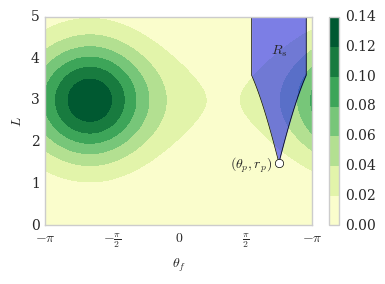

In [25]:
figure(figsize=[4,3],facecolor='white')
prob_dist(3,1,1,-2*pi/3)
RR = Ls(theta_point,r_point,th)
fill_between(th,RR,5,facecolor='b',linewidth=0,alpha=0.5)
x_points = r_[th[0],th,th[-1]]
y_points = r_[5,RR,5]
plot(x_points,y_points,'k',linewidth=0.5)
# Point
plot(theta_point,r_point,'o',mfc='w',mec='k')
annotate(
    r'$(\theta_p,r_p)$',
    xy=(theta_point,r_point),
    xytext=(-5,5),
    textcoords='offset points',
    verticalalignment='top',
    horizontalalignment='right')
annotate(
    r'$R_s$',
    xy=(theta_point,4),
    va='bottom',
    ha='center')
tight_layout()
savefig('../reports/figures/cart_shade.pdf')

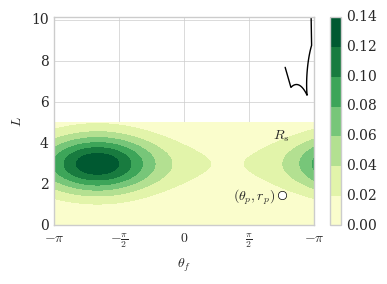

In [42]:
figure(figsize=[4,3],facecolor='white')
prob_dist(3,1,1,-2*pi/3)
RR = Ls(theta_point,r_point,th)
#fill_between(th,RR,5,facecolor='b',linewidth=0,alpha=0.5)
x_points = r_[th[0],th,th[-1]]
y_points = r_[5,RR,5]

x1,y1 = polar_shift(x_points,y_points,3,pi/3,pi)[:,0,:]
plot(x1,y1,'k',linewidth=1)
# Point
plot(theta_point,r_point,'o',mfc='w',mec='k')
annotate(
    r'$(\theta_p,r_p)$',
    xy=(theta_point,r_point),
    xytext=(-5,5),
    textcoords='offset points',
    verticalalignment='top',
    horizontalalignment='right')
annotate(
    r'$R_s$',
    xy=(theta_point,4),
    va='bottom',
    ha='center')
tight_layout()
#savefig('../reports/figures/cart_shade.pdf')

In [38]:
polar_shift(x_points,y_points,0.1,pi/3,pi)[:,0,:]

array([[ 1.74680582,  1.75996522,  1.77310728,  1.7862536 ,  1.79940438,
         1.81255981,  1.82572012,  1.83888552,  1.85205626,  1.86523258,
         1.87841474,  1.89160302,  1.90479771,  1.91799911,  1.93120755,
         1.94442337,  1.95764693,  1.97087862,  1.98411884,  1.99736803,
         2.01062665,  2.02389518,  2.03717415,  2.05046411,  2.06376566,
         2.07707944,  2.09040612,  2.10374643,  2.11710115,  2.13047114,
         2.14385728,  2.15726056,  2.17068203,  2.18412283,  2.19758419,
         2.21106745,  2.22457406,  2.23810562,  2.25166383,  2.2652506 ,
         2.27886799,  2.29251826,  2.3062039 ,  2.31992768,  2.33369263,
         2.34750212,  2.36135988,  2.37527011,  2.38923744,  2.40326713,
         2.41736504,  2.43153783,  2.44109469,  2.4508525 ,  2.46079263,
         2.47089867,  2.48115612,  2.4915521 ,  2.50207514,  2.51271502,
         2.52346255,  2.53430948,  2.54524838,  2.55627254,  2.56737586,
         2.57855283,  2.58979842,  2.60110803,  2.6

In [30]:
x1.shape

(1, 103)

In [28]:
y1

array([[ 5.02741971,  3.62854837,  3.60087015,  3.57259578,  3.54372993,
         3.5142774 ,  3.48424308,  3.45363194,  3.42244906,  3.39069963,
         3.35838889,  3.32552223,  3.29210508,  3.258143  ,  3.22364162,
         3.18860667,  3.15304396,  3.1169594 ,  3.08035898,  3.04324878,
         3.00563496,  2.96752376,  2.92892152,  2.88983465,  2.85026965,
         2.81023309,  2.76973162,  2.72877198,  2.68736099,  2.64550552,
         2.60321255,  2.56048911,  2.51734232,  2.47377936,  2.42980748,
         2.38543403,  2.3406664 ,  2.29551206,  2.24997854,  2.20407346,
         2.15780448,  2.11117936,  2.06420589,  2.01689196,  1.9692455 ,
         1.92127451,  1.87298708,  1.82439134,  1.7754955 ,  1.72630784,
         1.6768367 ,  1.62709049,  1.67975067,  1.73214995,  1.78427811,
         1.83612518,  1.88768139,  1.93893712,  1.98988296,  2.04050962,
         2.09080795,  2.14076896,  2.19038373,  2.23964351,  2.28853963,
         2.33706354,  2.38520677,  2.43296097,  2.4

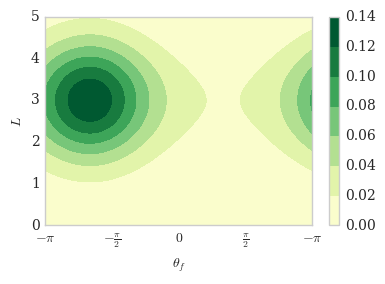

In [14]:
figure(figsize=[4,3],facecolor='white')
prob_dist(3,1,1,-2*pi/3)
RR = Ls(theta_point,r_point,th)
#fill_between(th,RR,5,facecolor='k',linewidth=0,alpha=0.6)
#plot(r_[th[0],th,th[-1]],r_[5,RR,5],'k',linewidth=2)
tight_layout()
#savefig('../reports/figures/prob_2d.pdf')

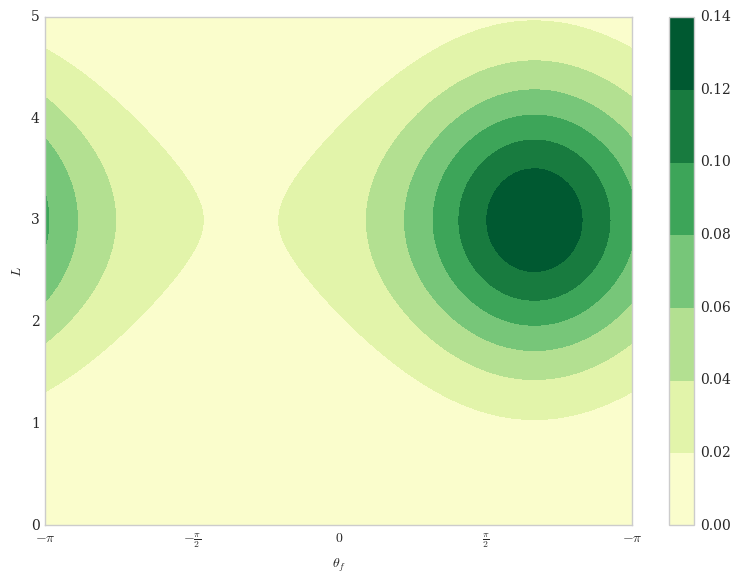

In [15]:
prob_dist(3,1,1,2*pi/3)
#savefig('../reports/figures/prob_2d.eps')

In [16]:
def P_shade(rr,theta,vw=0,theta_w_deg=0,L_mean=3,L_std=1,fs=0.5,fr=2,stiff=1):
    
    # Convert theta_w to radians
    theta_w = theta_w_deg*pi/180
    
    # Frond half-span angle
    alpha = arctan((1+fs)/(2*fs*fr))
    
    # Try single integral
    def single_pdf(theta_f):
        
        theta_prime = theta - theta_f + pi/2
        S = sign(pi/2-theta_prime)
        
        # Minimum L for shading as a function of central frond angle
        L_star = rr*(sin(theta_prime)+2*S*fr/(1+fs)*cos(theta_prime))
    
        # Integrated normalized L distribution
        C_L = erf((L_star-L_mean)/(sqrt(2)*L_std)) / (1-erf(-L_mean/(sqrt(2)*L_std)))
        
        # Theta_f distribution
        if vw > 0:
            P_theta_f = vonmises.pdf(theta_f,vw/stiff,theta_w)
        else:
            P_theta_f = ones_like(theta_f)/(2*pi)
        
        return (1-C_L)*P_theta_f/2
    SI = quad(single_pdf,theta-alpha,theta+alpha)
    
    return SI[0]

In [17]:
# Lone shade probability plot
def shade_plot(vw=0,theta_w_deg=0,L_mean=3,L_std=1,fs=0.5,fr=2,stiff=1):
    th = linspace(-pi,pi,48)
    rr = linspace(0,5,31)
    rr,th = meshgrid(rr,th)

    PP = zeros_like(rr)

    for ii in range(PP.shape[0]):
        for jj in range(PP.shape[1]):
            PP[ii,jj] = P_shade(rr[ii,jj],th[ii,jj],vw=vw,theta_w_deg=theta_w_deg,
                L_mean=L_mean,L_std=L_std,fs=fs,fr=fr,stiff=stiff)

    fig = figure(figsize=[4.5,4])
    gca(projection='polar')

    # Shade probability plot
    contourf(th,rr,PP,cmap='YlGn',levels=linspace(0,0.5,101))
    ylim(0,5)
    colorbar()
    tight_layout()
    
    return (th,rr,PP)


In [18]:
sns.reset_orig()
#Set font
font = {'family':'serif','size':10}
mpl.rc('font',**font)

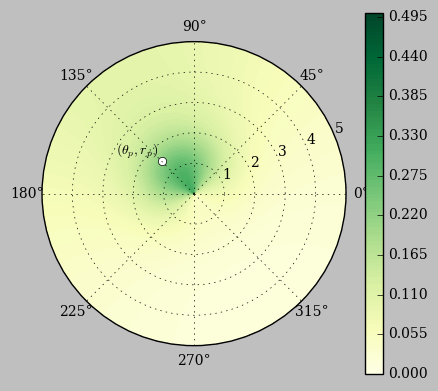

In [19]:
figure(figsize=[4,4],facecolor='white')
shade_plot(1,120,3,1,0.5,2)
plot(theta_point,r_point,'o',mfc='w',mec='k')
annotate(
    r'$(\theta_p,r_p)$',
    xy=(theta_point,r_point),
    xytext=(-3,0),
    textcoords='offset points',
    verticalalignment='bottom',
    horizontalalignment='right')
#savefig('../reports/figures/prob_shade.pdf')

In [20]:
def visualize(vw=0,theta_w_deg=0,L_mean=3,L_std=1,fs=0.5,fr=2,stiff=1):
    th = linspace(-pi,pi,22)
    rr = linspace(0,5,22)
    rr,th = meshgrid(rr,th)

    PP = zeros_like(rr)

    for ii in range(PP.shape[0]):
        for jj in range(PP.shape[1]):
            PP[ii,jj] = P_shade(rr[ii,jj],th[ii,jj],vw=vw,theta_w_deg=theta_w_deg,
                L_mean=L_mean,L_std=L_std,fs=fs,fr=fr,stiff=stiff)

    fig = gcf()
    fig.set_size_inches(16,8)
    
    # Shade probability plot
    fig.add_axes([0,0,0.45,1],projection='polar')
    contourf(th,rr,PP,cmap='YlGn',levels=linspace(0,1,101))
    
    # Kelp plot
    fig.add_axes([0.55,0,0.45,1],projection='polar')
    plot_rope(50,vw=vw,theta_w_deg=theta_w_deg,L_mean=L_mean,L_std=L_std,fs=fs,fr=fr,stiff=stiff)
   
    # Draw current velocity
    theta_w = theta_w_deg*pi/180
    water_ax = fig.add_axes([0.35,0,0.3,0.3],projection='polar')
    water_ax.get_xaxis().set_ticklabels([])
    water_ax.get_yaxis().set_ticklabels([])
    water_ax.annotate('',xy=(theta_w,vw),xytext=(0,0),
        arrowprops=dict(facecolor='black', shrink=0.05),
        horizontalalignment='left',
        verticalalignment='bottom',)
    water_ax.set_ylim(0,3)
    
    #return PP

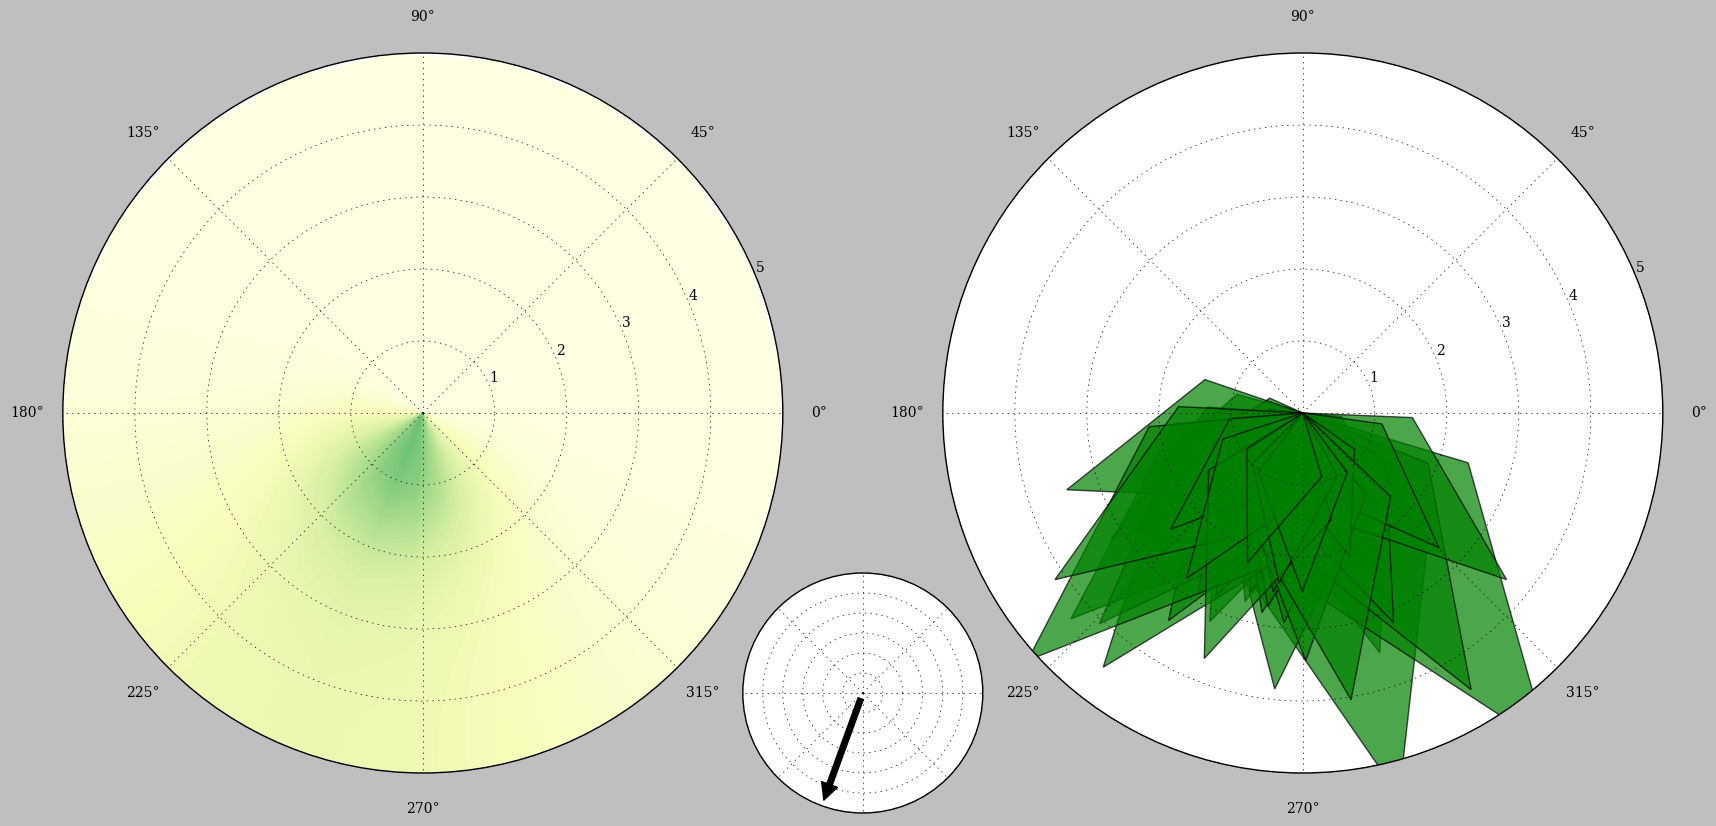

In [21]:
#11x11
visualize(3,250)

In [22]:
# Make animation
#for tt in range(50,201):
#    print("t = {}".format(tt))
#    theta_w_deg = 180*(tt/100-1)
#    vw = 3*abs(sin(tt*pi/50))
#    visualize(vw=vw,theta_w_deg=theta_w_deg,L_mean=3,L_std=0.5)
#    savefig('../results/shading_model/movie/img/{:03d}.png'.format(tt))

# 3D

In [23]:
arctan(-1)/pi

-0.25

In [15]:
# Calculate theta in [-pi,pi) from x,y
def theta_xy(x,y):
    # Calculate value in [0,2*pi]
    try:
        pos_val = arctan(y/x) + pi*(x<0)
    except(ZeroDivisionError):
        pos_val = sign(y)*pi/2
    
    # Numpy returns nan on divide by zero
    # Change nans to 0.
    try:
        pos_val[isnan(pos_val)] = 0
    except(TypeError):
        if isnan(pos_val):
            pos_val = 0
    
    # Shift range
    new_val = pos_val - (pos_val>=pi)*2*pi
    
    return new_val

In [16]:
def to_2d_array(X):
    if ndim(X) == 0:
        return array([[X]])
    elif ndim(X) == 1:
        return array([X])
    else:
        return array(X)

In [17]:
# Shift coordinates along sun ray a depth dz
def polar_shift(theta,rr,dz,phi_s=0,theta_s=0):
    # Convert theta, rr to 2d arrays
    theta,rr = map(to_2d_array,[theta,rr])
    
    # Old cartesian coordinates
    xx = rr*cos(theta)
    yy = rr*sin(theta)
    
    # Cartesian shifts
    dx = dz*tan(phi_s)*cos(theta_s)
    dy = dz*tan(phi_s)*sin(theta_s)
    
    # New cartesian coordinates
    x_hat = xx + dx 
    y_hat = yy + dy 
    
    # New polar coordinates
    theta_hat = array(theta_xy(x_hat,y_hat))
    r_hat = array(sqrt(x_hat**2 + y_hat**2))
    
    # Preserve angle if zero radius or theta = pi
    if dz == 0:
        theta_hat[rr==0] = theta[rr==0]
        theta_hat[theta==pi] = theta[theta==pi]
    
    return array([theta_hat,r_hat])

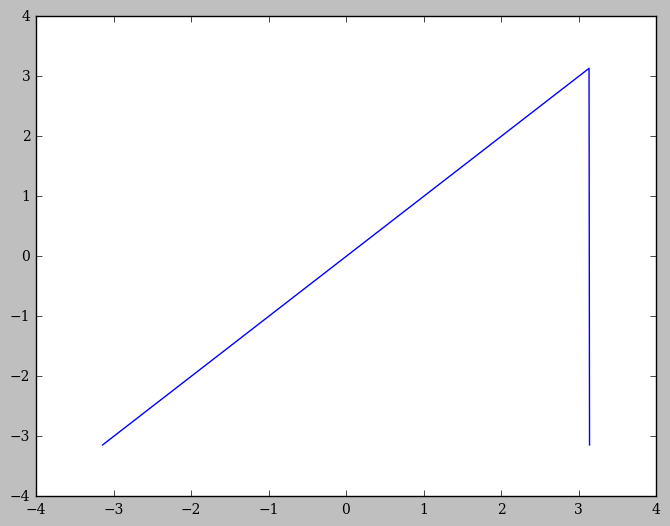

In [27]:
tt = linspace(-pi,pi,1001)
plot(tt,theta_xy(cos(tt),sin(tt)))

In [28]:
def plot_frond_shift(L=1,fr=2,fs=0.5,theta_f=0,alpha=0.7,color='g',fill_bool=True,theta_s=0,phi_s=0,dz=0):
    figure(1,figsize=[6,6])
    gca(projection='polar')
    theta_a = arctan(2*fr*fs/(1+fs))
    theta_prime = linspace(theta_a,pi-theta_a,1e3)
    S = sign(pi/2 - theta_prime)
    r_max = L/(sin(theta_prime)+2*S*fr/(1+fs)*cos(theta_prime)) 
    theta = theta_prime + theta_f - pi/2
    
    if(fill_bool==True):
        print('a')
        fill(*polar_shift(r_[0,theta,0],r_[0,r_max,0],theta_s=theta_s,phi_s=phi_s,dz=dz),color,alpha=alpha)
        print('b')
    else:
        plot(*polar_shift(r_[0,theta,0],r_[0,r_max,0],theta_s=theta_s,phi_s=phi_s,dz=dz),color,alpha=alpha)
    print('c')
    xlim(0,2*pi)
    print('d')
    ylim(0,5)
    print('e')

In [29]:
#plot_frond_shift(L=3,theta_f=pi/3,theta_s=pi/2,phi_s=pi/6,dz=5)

In [37]:
# Lone shade probability plot
def shade_plot_3d(vw=0,theta_w_deg=0,L_mean=3,L_std=1,fs=0.5,fr=2,stiff=1,phi_s_deg=30,theta_s_deg=45,dz=0):
    th = linspace(-pi,pi,48)
    rr = linspace(0,5,31)
    rr,th = meshgrid(rr,th)
    
    # Convert phi_s,theta_s to radians
    phi_s,theta_s = map(lambda x: x*pi/180,[phi_s_deg,theta_s_deg])
    
    # Shift point towards the sun
    theta_p_hat,r_p_hat = polar_shift(rr=rr,theta=th,phi_s=phi_s,theta_s=theta_s,dz=dz)

    # Allocate probability array
    PP = zeros_like(rr)

    # Calculate probability of shading for each point - loop radially & angularly
    for ii in range(PP.shape[0]):
        for jj in range(PP.shape[1]):
            PP[ii,jj] = P_shade(r_p_hat[ii,jj],theta_p_hat[ii,jj],vw=vw,theta_w_deg=theta_w_deg,
                L_mean=L_mean,L_std=L_std,fs=fs,fr=fr,stiff=stiff)

    fig = figure(figsize=[4.5,4])
    gca(projection='polar')

    # Shade probability plot
    contourf(th,rr,PP,cmap='YlGn',levels=linspace(0,0.5,101))
    ylim(0,5)
    colorbar()
    tight_layout()
    
    return (th,rr,PP)


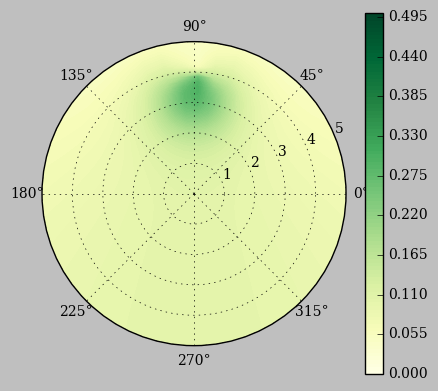

In [62]:
kw = dict(vw=1,
          theta_w_deg=-90,
          L_mean=3,
          L_std=1)
A = shade_plot_3d(**kw,
                  phi_s_deg=45,
                  theta_s_deg=-90,
                  dz=4)

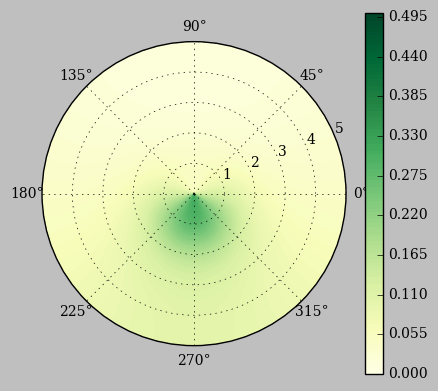

In [32]:
A=shade_plot(vw=1,theta_w_deg=-90)